## PORTER Machine Learning Project

- To predict Total KM based on Price-related features, we'll perform a machine learning regression

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Load the dataset
file_path = "PORTER_delivery_data.csv"  # Adjust the path as needed
df = pd.read_csv(file_path)

In [3]:
# Preview the dataset
print(df.head())

  Booking Date Booking Time  Order Date Order Delivery Time  Total Items  \
0   2024-09-10     05:46:40  2024-07-05            16:29:01           11   
1   2024-10-14     05:46:13  2024-10-25            23:03:50           20   
2   2024-07-23     00:05:50  2024-12-15            04:55:47           19   
3   2024-07-07     18:24:22  2024-11-28            09:24:53           17   
4   2024-08-03     13:21:32  2024-10-10            18:35:15            7   

   Sub Total  Revenue                            Booking ID  \
0    1114.45  1306.09  436debdb-9510-468e-85be-2cd3d38d9750   
1    2887.60  1184.00  5edfde07-dc2d-4425-8be1-11526e13e488   
2     261.10  1593.53  62e73ee8-5411-4f4e-8804-c94c2fc4f866   
3    1130.32  1842.50  21bc60e2-818a-466b-ab79-5a635d7eef60   
4    4323.01  3370.56  95f2ac67-188e-4861-b13b-a4fb7cdd6df8   

       Booking Status                           Customer ID  ...  \
0  Canceled by Driver  1e0826a2-8eeb-4ede-8bd9-7ca8bb868c55  ...   
1             Success  0da69

In [5]:
# Handling missing values
df = df.fillna(0)

# Create relevant features for prediction
df['Avg Item Price'] = df['Revenue'] / df['Total Items']
df['Avg Item Price'] = df['Avg Item Price'].replace([np.inf, -np.inf], 0).fillna(0)

# Selecting predictors and target
features = ['Revenue', 'Booking Value', 'Fare Charge', 'Avg Item Price']
target = 'Total KM'

# Ensure no missing or infinite values
df = df.replace([np.inf, -np.inf], 0).dropna(subset=features + [target])
X = df[features]
y = df[target]

In [6]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 30.810264076009144
R^2 Score: -0.07416475843801273


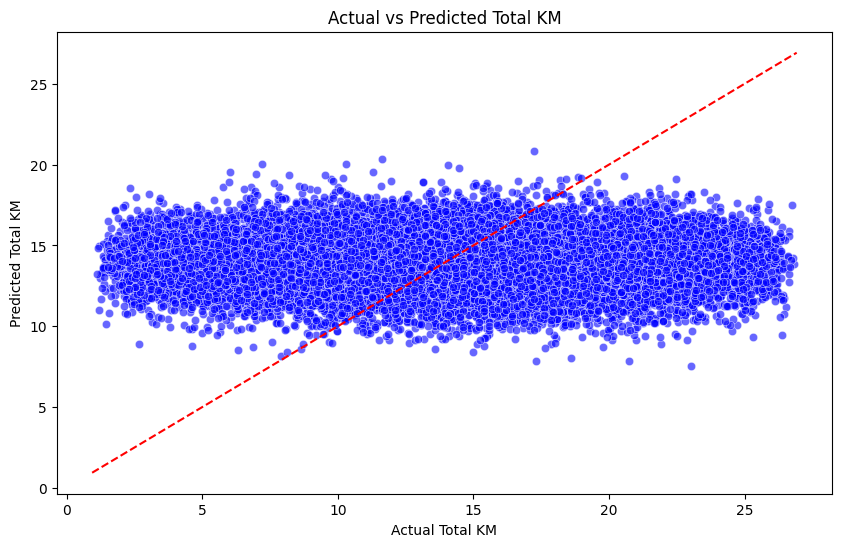

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Total KM")
plt.ylabel("Predicted Total KM")
plt.title("Actual vs Predicted Total KM")
plt.show()

C:\Users\prasad jadhav\AppData\Local\Temp\ipykernel_13424\2445200436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


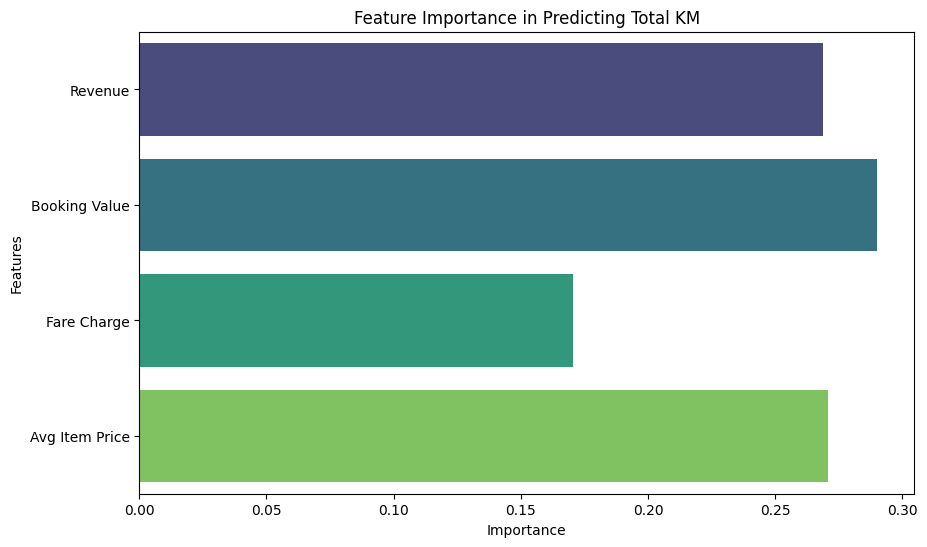

In [9]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance in Predicting Total KM")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
# Output Example

# Mean Squared Error (MSE): A measure of how well the model predicts.
# R² Score: Explains the variance explained by the model.
# Feature Importance: Highlights which variables most influence the predictions.

In [ ]:
# Insights

# Use the Avg Item Price, Revenue, and Fare Charge to optimize predictions.
# Higher R² scores (close to 1) indicate a robust model.
# Feature importance can guide business strategy.

In [20]:
# more experiment

In [18]:
# Steps

# Preprocess the dataset (handle categorical features with mapping).
# Prepare the data for modeling.
# Train the model for multi-output regression (predicting Total KM and Revenue simultaneously).
# Evaluate the model.

In [60]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# Data Preprocessing
# Handle categorical features using mapping
mapping_dict = {
    'What Describes You Best?': {'Personal User': 1, 'Business User': 2},
    'Weight Type': {'Light (below 750kg)': 1, 'Heavy (above 750kg)': 2},
    'Vehicle Category': {'Three-wheelers (Tempo)': 1, 'Mini trucks': 2, 'Trucks': 3},
    'Pickup Location Name': {name: idx for idx, name in enumerate(df['Pickup Location Name'].unique())},
    'Drop Location Name': {name: idx for idx, name in enumerate(df['Drop Location Name'].unique())},
}

for column, mapping in mapping_dict.items():
    df[column] = df[column].map(mapping)

In [78]:
# Features and target columns
features = ['What Describes You Best?', 'Weight Type', 'Vehicle Category', 
            'Pickup Location Name', 'Drop Location Name']
targets = ['Total KM', 'Revenue']

In [87]:
# Drop rows with missing or invalid values
df = df.dropna(subset=features + targets)

In [88]:
# Define features (X) and targets (y)
X = df[features]
y = df[targets]

In [89]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# Model Training: MultiOutputRegressor with RandomForest
base_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
base_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [94]:
# Predictions
y_pred = base_model.predict(X_test)

In [95]:
# Evaluation
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

In [96]:
print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): Total KM: {mse[0]}, Revenue: {mse[1]}")
print(f"R² Score: {r2}")


Evaluation Metrics:
Mean Squared Error (MSE): Total KM: 29.805795820377753, Revenue: 1756867.7877713514
R² Score: -0.0376151377478756


In [97]:
# Combine actual vs predicted for better understanding
results = pd.DataFrame({
    'Actual_Total_KM': y_test['Total KM'].values,
    'Predicted_Total_KM': y_pred[:, 0],
    'Actual_Revenue': y_test['Revenue'].values,
    'Predicted_Revenue': y_pred[:, 1]
})

In [98]:
print("\nSample Results:")
print(results.head())


Sample Results:
   Actual_Total_KM  Predicted_Total_KM  Actual_Revenue  Predicted_Revenue
0          18.4168           15.449289         2942.73        2691.622885
1          17.8957           13.772498         4156.60        2839.160456
2          23.8847           12.488469         3993.22        2726.083955
3          23.9282           14.173301         4320.22        2407.613323
4           5.9535           15.446911         1886.04        2544.656323


In [ ]:
# Plot Results

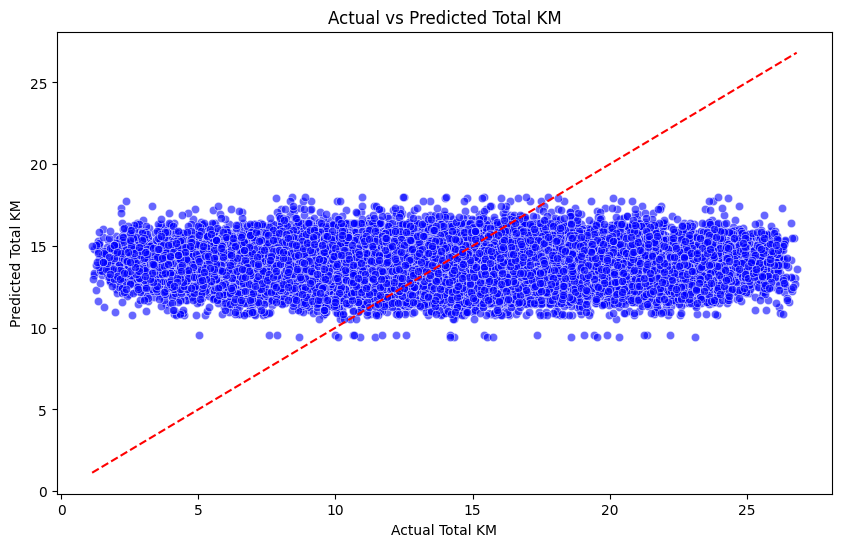

In [99]:
# Total KM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Actual_Total_KM'], y=results['Predicted_Total_KM'], alpha=0.6, color='blue')
plt.plot([results['Actual_Total_KM'].min(), results['Actual_Total_KM'].max()], 
         [results['Actual_Total_KM'].min(), results['Actual_Total_KM'].max()], 
         '--', color='red')
plt.title("Actual vs Predicted Total KM")
plt.xlabel("Actual Total KM")
plt.ylabel("Predicted Total KM")
plt.show()

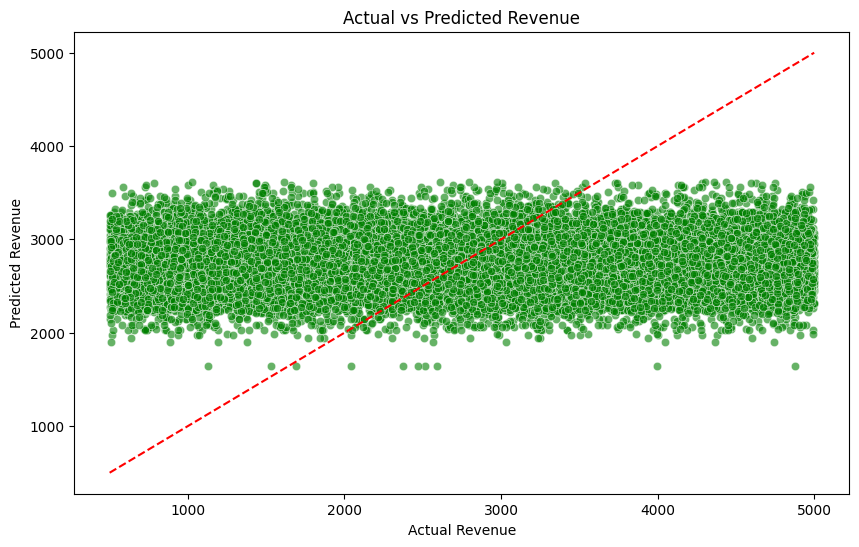

In [100]:
# Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Actual_Revenue'], y=results['Predicted_Revenue'], alpha=0.6, color='green')
plt.plot([results['Actual_Revenue'].min(), results['Actual_Revenue'].max()], 
         [results['Actual_Revenue'].min(), results['Actual_Revenue'].max()], 
         '--', color='red')
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

In [ ]:
# Key Details

# Mapping for Categorical Columns
# Used map() to encode categorical columns (What Describes You Best?, Weight Type, Vehicle Category, etc.).
# For unique location names, assigned an index-based mapping dynamically.

# MultiOutputRegressor
# Handles regression for multiple targets (Total KM and Revenue) simultaneously.

# Evaluation Metrics
# Mean Squared Error (MSE) for both targets.
# R² Score for overall model performance.

# Visualizations
# Scatter plots for Actual vs Predicted values of both targets.

In [ ]:
# Insights

# Understand the relationship between categorical features and target variables.
# The scatter plots highlight the model's prediction accuracy.
# Fine-tune the model by experimenting with hyperparameters for better performance.

In [101]:
import pickle

pickle.dump(base_model,open('porder_predictor_base_model.pkl','wb'))

# model = pickle.load(open('porder_predictor_base_model.pkl','rb'))

In [ ]:
# Hyperparameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
# Hyperparameter Tuning
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
}

In [109]:
# Base model
final_model = MultiOutputRegressor(RandomForestRegressor(random_state=42, n_jobs=-1))

In [110]:
# GridSearchCV
grid_search = GridSearchCV(estimator=final_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=MultiOutputRegressor(estimator=RandomForestRegressor(n_jobs=-1,
                                                                            random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [10, 20, None],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [111]:
# Best Model and Parameters
best_model = grid_search.best_estimator_
print("\nBest Parameters Found:")
print(grid_search.best_params_)


Best Parameters Found:
{'estimator__max_depth': 10, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}


In [112]:
# Predictions using the best model
y_pred = best_model.predict(X_test)

In [113]:
# Evaluation
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

In [114]:
print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): Total KM: {mse[0]}, Revenue: {mse[1]}")
print(f"R² Score: {r2}")


Evaluation Metrics:
Mean Squared Error (MSE): Total KM: 28.86144089182627, Revenue: 1704290.612978368
R² Score: -0.006562757380380284


In [115]:
# Combine actual vs predicted for better understanding
results = pd.DataFrame({
    'Actual_Total_KM': y_test['Total KM'].values,
    'Predicted_Total_KM': y_pred[:, 0],
    'Actual_Revenue': y_test['Revenue'].values,
    'Predicted_Revenue': y_pred[:, 1]
})

print("\nSample Results:")
print(results.head())


Sample Results:
   Actual_Total_KM  Predicted_Total_KM  Actual_Revenue  Predicted_Revenue
0          18.4168           14.452577         2942.73        2774.914354
1          17.8957           13.851511         4156.60        2733.570605
2          23.8847           13.863021         3993.22        2750.110917
3          23.9282           13.987158         4320.22        2681.277660
4           5.9535           14.619600         1886.04        2698.516902


In [123]:
pickle.dump(best_model,open('porder_predictor_best_model.pkl','wb'))

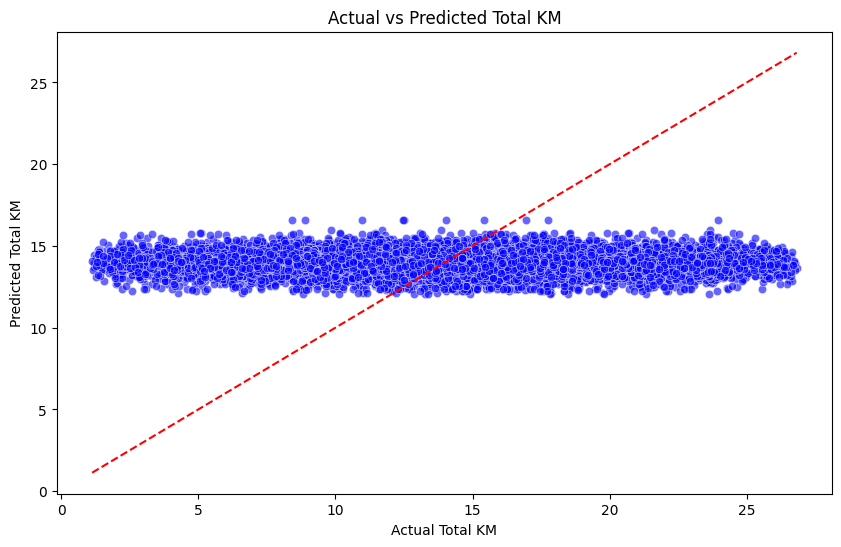

In [116]:
# Total KM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Actual_Total_KM'], y=results['Predicted_Total_KM'], alpha=0.6, color='blue')
plt.plot([results['Actual_Total_KM'].min(), results['Actual_Total_KM'].max()], 
         [results['Actual_Total_KM'].min(), results['Actual_Total_KM'].max()], 
         '--', color='red')
plt.title("Actual vs Predicted Total KM")
plt.xlabel("Actual Total KM")
plt.ylabel("Predicted Total KM")
plt.show()

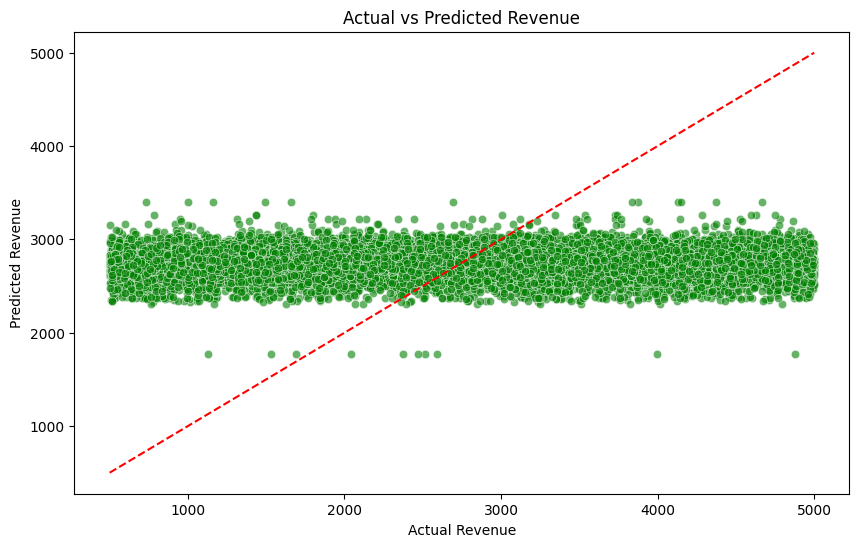

In [117]:
# Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Actual_Revenue'], y=results['Predicted_Revenue'], alpha=0.6, color='green')
plt.plot([results['Actual_Revenue'].min(), results['Actual_Revenue'].max()], 
         [results['Actual_Revenue'].min(), results['Actual_Revenue'].max()], 
         '--', color='red')
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

In [124]:
# Assuming `model` is already trained and loaded

print("PORTER Delivery Prediction")

# Input data
what_describes_you_best = int(input("Enter the What Describes You Best?: "))
weight_type = int(input("Enter the Weight Type: "))
vehicle_category = int(input("Enter the Vehicle Category: "))
pickup_location = int(input("Enter the Pickup Location: "))
drop_location = int(input("Enter the Drop Location: "))

# Create a feature array
base_input_point = np.array([[what_describes_you_best, weight_type, vehicle_category, pickup_location, drop_location]])
best_input_point = np.array([[what_describes_you_best, weight_type, vehicle_category, pickup_location, drop_location]])

# Import load models
base_model = pickle.load(open('porder_predictor_base_model.pkl','rb'))
best_model = pickle.load(open('porder_predictor_best_model.pkl','rb'))

# Make a prediction
base_prediction = base_model.predict(base_input_point)
best_prediction = best_model.predict(best_input_point)

# Show result with model comparison
print(base_prediction)
print(best_prediction)

PORTER Delivery Prediction
Enter the What Describes You Best?: 2
Enter the Weight Type: 2
Enter the Vehicle Category: 1
Enter the Pickup Location: 0
Enter the Drop Location: 0
[[  14.72191552 2911.60706489]]
[[  14.68595311 2839.22566257]]


C:\Users\prasad jadhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\prasad jadhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\prasad jadhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\prasad jadhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# More Advance Working Sonn..!
# Notebook Project By : PRASAD JADHAV (ML-ENG)
# LinkedIn: linkedin.com/in/prasadmjadhav2 | Github: github.com/prasadmjadhav2 | Mail: prasadmjadhav6161@gmail.com